In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import psycopg2


In [3]:
conn = psycopg2.connect(host="192.168.107.30", port = 5432, database="postgres", user="postgres", password="post221b")
cur = conn.cursor()

In [4]:
cur.execute("""with log as (
select ip from ip_port 
group by ip 
order by sum(traffic) desc limit 100 )
select ip_port.* from ip_port
join log
using(ip)
""") 

In [5]:
query_all = cur.fetchall()

In [6]:
len(query_all)

334

In [7]:
df =  pd.DataFrame(query_all,columns=[ "ip",
"port",
"udp_percentage'",
"tcp_percentage" ,  
"icmp_percentage",
"http_percentage" ,
"https_percentage",
"dns_percentage",
"quic_percentage", 
"traffic", 
"hits"]);


In [8]:
df = df.fillna(0)

In [9]:
df['ip'] = df['ip'].astype('category')
df['port'] =  df['port'].astype('category')

In [10]:
df.head()

,ip,port,udp_percentage',tcp_percentage,icmp_percentage,http_percentage,https_percentage,dns_percentage,quic_percentage,traffic,hits
0,5.106.10.154,0,0.0,0.0,100.0,0.0,0.000000,0,0.0,81490,14
1,5.106.10.154,443,0.0,100.0,0.0,0.0,99.999620,0,0.0,50565278446,4010
2,5.106.10.155,0,0.0,0.0,100.0,0.0,0.000000,0,0.0,45356,11
3,5.106.10.155,443,0.0,100.0,0.0,0.0,99.999711,0,0.0,57182737675,4285
4,5.106.10.156,0,0.0,0.0,100.0,0.0,0.000000,0,0.0,51870,17


In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['port_cat'] = labelencoder.fit_transform(df['port'])
df['ip_cat'] = labelencoder.fit_transform(df['ip'])

In [12]:
# number of unique port
#df['port_cat'].nunique()  out:83
df['ip_cat'].nunique()

100

In [13]:
df.columns

Index(['ip', 'port', 'udp_percentage'', 'tcp_percentage', 'icmp_percentage',
       'http_percentage', 'https_percentage', 'dns_percentage',
       'quic_percentage', 'traffic', 'hits', 'port_cat', 'ip_cat'],
      dtype='object')

In [14]:
from sklearn.preprocessing import OneHotEncoder 
enc = OneHotEncoder(handle_unknown='ignore')
enc_port = pd.DataFrame(enc.fit_transform(df[['port_cat','ip_cat']]).toarray())
df = df.join(enc_port)

In [15]:
# df.drop('port_cat',inplace=True,axis= 1)
df.drop('ip_cat',inplace=True,axis=1)

In [16]:
df.columns

Index([              'ip',             'port',  'udp_percentage'',
         'tcp_percentage',  'icmp_percentage',  'http_percentage',
       'https_percentage',   'dns_percentage',  'quic_percentage',
                'traffic',
       ...
                      173,                174,                175,
                      176,                177,                178,
                      179,                180,                181,
                      182],
      dtype='object', length=195)

In [17]:
df

,ip,port,udp_percentage',tcp_percentage,icmp_percentage,http_percentage,https_percentage,dns_percentage,quic_percentage,traffic,...,173,174,175,176,177,178,179,180,181,182
0,5.106.10.154,0,0.000000,0.000000,100.0,0.00000,0.000000,0,0.000000,81490,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.106.10.154,443,0.000000,100.000000,0.0,0.00000,99.999620,0,0.000000,50565278446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.106.10.155,0,0.000000,0.000000,100.0,0.00000,0.000000,0,0.000000,45356,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.106.10.155,443,0.000000,100.000000,0.0,0.00000,99.999711,0,0.000000,57182737675,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.106.10.156,0,0.000000,0.000000,100.0,0.00000,0.000000,0,0.000000,51870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,213.202.6.144,443,85.690874,14.309126,0.0,0.00000,14.309087,0,85.047503,52527713130,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
330,216.58.209.138,0,0.000000,0.000000,100.0,0.00000,0.000000,0,0.000000,50502027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
331,216.58.209.138,80,0.000000,100.000000,0.0,87.32946,0.000000,0,0.000000,25990590,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
332,216.58.209.138,443,31.517615,68.482385,0.0,0.00000,68.430448,0,30.818461,64741548199,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
X = df.iloc[:, 2:].values
# Y = df.iloc[:,0].values

In [19]:
X

array([[  0.        ,   0.        , 100.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 100.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        , 100.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        , 100.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 31.51761516,  68.48238484,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [100.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_std = sc_X.fit_transform(X)


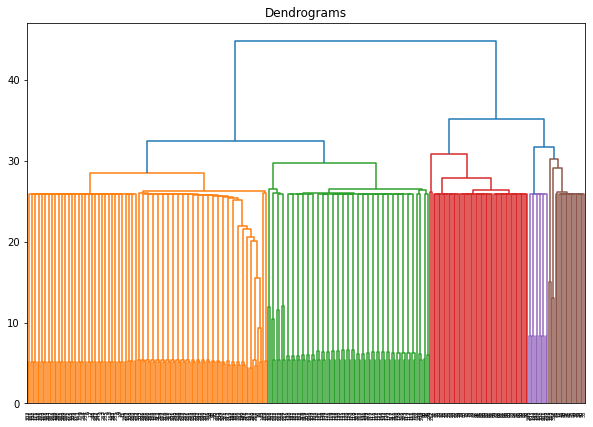

In [21]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_std, method='ward'))

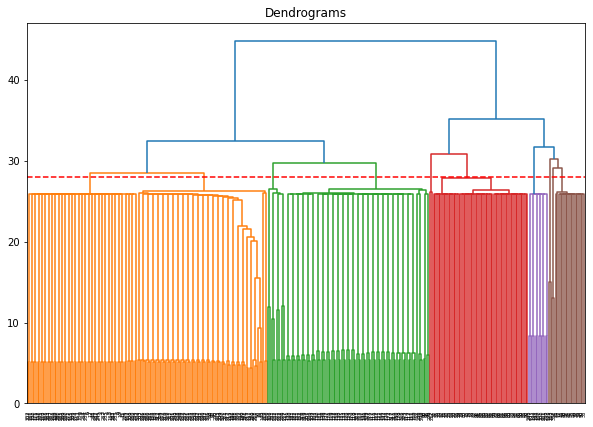

In [22]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_std, method='ward'))
plt.axhline(y=28, color='r', linestyle='--')

In [23]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')  
out_with_ip = cluster.fit_predict(X_std)

In [24]:
len(out_with_ip)

334

In [25]:
out_with_ip

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 0, 7, 7, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 7, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 9, 9, 1, 1, 1, 3, 3, 4, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 2, 2, 2, 2, 2, 2, 8, 9, 9, 9, 9, 2,
       2, 6, 9, 9, 2, 2, 2, 1, 1, 1, 2, 5, 2, 2, 5, 2, 2, 2, 2, 2, 6, 2,
       2, 3, 3, 3, 4, 4, 3, 3, 3, 4, 4, 3, 3, 3, 4, 4, 9, 9, 2, 2, 2, 2,
       2, 2, 4, 4, 9, 9, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,